The team at FiveThirtyEight wanted to dissect the deaths of the Avengers in the comics over the years. The writers were known to kill off and revive many of the superheroes so they were curious to know what data they could grab from the Marvel Wikia site, a fan-driven community site, to explore further. To learn how they collected their data, which is available on their Github repo, read the writeup they published on their site.

While the FiveThirtyEight team has done a wonderful job acquiring this data, the data still has some inconsistencies. Your mission, if you choose to accept it, is to clean up their dataset so it can be more useful for analysis in Pandas. First things first: read our dataset into Pandas as a DataFrame and preview the first 5 rows to get a better sense of our data.

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv'
avengers = pd.read_csv(url, index_col=0,parse_dates=[0])
avengers.head(5)

,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
URL,,,,,,,,,,,,,,,,,,,,
http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
http://marvel.wikia.com/Janet_van_Dyne_(Earth-616),Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
http://marvel.wikia.com/Robert_Bruce_Banner_(Earth-616),Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


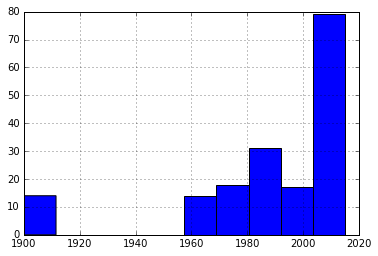

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
true_avengers = pd.DataFrame()

avengers['Year'].hist()

We only want to keep the Avengers who were introduced after 1960. Filter out all Avengers introduced before 1960 and store only the ones added in 1960 or later in true_avengers.

In [55]:
true_avengers = avengers[avengers["Year"]>=1960]

We are interested in the number of total deaths each character experienced and we'd like a field containing that distilled information. Right now, there are 5 fields (Death1 to Death5) that each contain a binary value representing if a superhero experienced that death or not. For example, a superhero can experience Death1, then Death2, etc. until they were no longer brought back to life by the writers.

We'd like to coalesce that information into just one field so we can do numerical analysis more easily.


Create a new column, Deaths, that contains the number of times each superhero died. The possible values for each death field are YES, NO, and the Pandas NaN value used to represent missing data. Keep all of the original columns (including Death1 to Death5) and update true_avengers with the new Deaths column.

In [57]:
columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
death_cols = true_avengers[columns]
#Replace NaNs with zeros
death_cols = death_cols.fillna(0)
#Replace strings with integers   
death_cols = death_cols.replace(to_replace='YES', value=1)
death_cols = death_cols.replace(to_replace='NO', value=0)
#sum the rows to get total number of deaths for each character
true_avengers["Deaths"] = death_cols.sum(axis=1)

    
'''
Alternative solution given by DQ:

columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
true_avengers[columns]
def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths

true_avengers['Deaths'] = true_avengers.apply(lambda row: clean_deaths(row), axis=1)
'''
 


/Users/kaitfolweiler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


"\nAlternative solution given by DQ:\n\ncolumns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']\ntrue_avengers[columns]\ndef clean_deaths(row):\n    num_deaths = 0\n    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']\n    \n    for c in columns:\n        death = row[c]\n        if pd.isnull(death) or death == 'NO':\n            continue\n        elif death == 'YES':\n            num_deaths += 1\n    return num_deaths\n\ntrue_avengers['Deaths'] = true_avengers.apply(lambda row: clean_deaths(row), axis=1)\n"

## 6: Years since joining
For the final task, we want to know if the Years since joining field accurately reflects the Year column. If an Avenger was introduced in Year 1960, is the Years since joining value for that Avenger 55?

Instructions

Calculate the number of rows where Years since joining is accurate. This challenge was created in 2015, so use that as the reference year. We want to know for how many rows Years since joining was correctly calculated as Year value subtracted from 2015.

In [73]:
def yearsjoined(year): 
    return 2015 - year

years_since_joined = true_avengers['Year'].apply(lambda year: yearsjoined(year))

years_bool = years_since_joined == true_avengers['Years since joining']

sum(years_bool==True)


159